# Install Requirements

In [2]:
%pip install pandas matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

/var/folders/d8/j5_fyf8941j_492zvf8948y40000gn/T/ipykernel_10013/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load Data

In [4]:
from pathlib import Path

REPOSITORY_PATH = Path().absolute().parent
DATA_DIR = REPOSITORY_PATH / Path("data")

assert DATA_DIR.is_dir()

## Load Sources DB

In [5]:
BRONNEN_DB_DIR = DATA_DIR / Path(
    "ffdb4d71-abb2-44a1-a0b0-f0544d8dacdc_Export-fce68157-ea1d-4e93-b29d-ea26fb67c0fa"
)
assert BRONNEN_DB_DIR.is_dir()

BRONNEN_FILE = BRONNEN_DB_DIR / Path(
    "Bronnen DB ebb1bca364c64cfebc8109b4fc3951eb_all.csv"
)
assert BRONNEN_FILE.is_file()

In [6]:
sources = pd.read_csv(BRONNEN_FILE)
sources.head()

,Name,URL Domein,Onderwerpen,Sector,Reclame,uBlocked trackers,Commercialiteit,Conclusie over doel vd bron,Vrije labels bron/onderwerp,Thumbs up 8-14?,...,Extra URL,Created time,Created by,URL Moederbedrijf,SlimZ Resultaten DB,Resultaten: toegankelijkheid,Cookie info page,More examples,Toegankelijkheidspagina,Related to Resultaten DB 01 (1) (Bronnen DB)
0,24baby.nl,https://www.24baby.nl/,NaN,Winkels en bedrijven div,over_the_top_ads,5.0,commercieel,"commercieel informatieproduct, reclamevehikel","nieuws, promotioneel, reclamevehikel, webshop,...",Just-in-case,...,NaN,"November 6, 2023 11:09 AM",Maarten Sprenger,NaN,NaN,"redelijk begrijpelijk,eenvoudig,redelijk begri...",https://24baby.app/privacybeleid,NaN,-,NaN
1,24kitchen.nl,https://www.24kitchen.nl,NaN,Entertainment-industrie,"company_promotion, limited_ads, sluikreclame",17.0,commercieel,"commercieel informatieproduct, entertainment","entertainment, infotainment, promotioneel",Just-in-case,...,NaN,"December 14, 2023 6:43 PM",Maarten Sprenger,https://privacy.thewaltdisneycompany.com/nl/de...,NaN,redelijk begrijpelijk,https://privacy.thewaltdisneycompany.com/nl/pr...,NaN,-,NaN
2,http://333travel.nl/,https://www.333travel.nl/,NaN,Reisorganisaties,company_promotion,7.0,commercieel,"informatie in kader van verkoop/bezoek, websh...","bedrijfsinfo/uithangbord, productinformatie, p...",Just-in-case,...,NaN,"February 23, 2024 5:35 PM",Maarten Sprenger,NaN,NaN,nvt,https://www.333travel.nl/cookies,NaN,NaN,NaN
3,absolutefacts.nl,https://www.absolutefacts.nl/,geschiedenis,Internetbedrijven,company_promotion,2.0,educatief_commercieel,commercieel informatieproduct,"informatie_primair_doel, webshop",Twijfel,...,NaN,"December 14, 2023 7:29 PM",Maarten Sprenger,https://www.absolutefigures.nl/,NaN,redelijk begrijpelijk,https://www.absolutefacts.nl/uw-privacy.htm,NaN,-,NaN
4,http://accuautoshop.nl/,https://www.accuautoshop.nl/,NaN,Winkels en bedrijven div,company_promotion,6.0,commercieel,webshop/winkel (+productinfo),webshop,Nee,...,NaN,"February 22, 2024 3:23 PM",Maarten Sprenger,NaN,NaN,"nvt,nvt",NaN,NaN,NaN,NaN


## Load Query DB

In [7]:
QUERY_DIR = DATA_DIR / Path(
    "b1e0c36a-e9d4-49b1-8b6b-2363200e535b_Export-6745f4f4-da35-4e86-9305-61aebe65f565/Query DB 01 5a4aec0449af4acc87a45c19be574353"
)
assert QUERY_DIR.is_dir()

QUERY_FILE = QUERY_DIR / Path("Untitled cacf3a0313a84561bac9b6ea48ecc189_all.csv")
assert QUERY_FILE.is_file()

In [8]:
all_queries = pd.read_csv(QUERY_FILE)

queries = (
    all_queries[all_queries["OK-100"] == "Yes"]
    .drop(["Created time"], axis=1)
    .astype({"Query": pd.StringDtype()})
)
queries.head()

,Query,Onderwerp,Soort Query (select),Leeftijd,Extra (multi),Kennisvenster?,'Samenvatting'?,Extra (top-down),Google,Video Facet,Videos-Schooltv?,Opmerkingen,OK-100,Add Results,Resultaten DB,Date,Bronnen DB,Ranking Conclusie
0,leven,Natuur/Biologie,Named entity,8,Media(ster),Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=leven&rlz=1C5C...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
1,wat betekent schotse,Taal/Cultuur,Vragen,10,NaN,Nee,Ja,Vragen van anderen (top),https://www.google.com/search?q=wat+betekent+s...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,Schotse - 2 definities - Encyclo (https://www....,NaN,NaN,NaN
2,middellandse zee,Aardrijkskunde,Named entity,11,NaN,Ja uitgebreid,Nee,"Afbeeldingen carroussel (top), Gerelateerde zo...",https://www.google.com/search?q=middellandse+z...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN
3,De smurfen,Taal/Cultuur,Named entity,10,Merk/Bedrijf,Ja,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.nl/search?q=De+smurfen&sca_...,https://www.google.nl/search?sca_esv=578451392...,-,NaN,Yes,Done,NaN,NaN,google.nl/com (https://www.notion.so/google-nl...,NaN
4,keurmerk max,Maatschappij,2 of meer woorden,7,NaN,Nee,Nee,"Gerelateerde zoekopdrachten (na 10), Meer om t...",https://www.google.com/search?q=keurmerk+max&r...,https://www.google.com/search?sca_esv=60037616...,-,NaN,Yes,Done,NaN,NaN,NaN,NaN


In [9]:
len(queries)

100

## Load Results DB

In [10]:
RESULTS_DIR = DATA_DIR / Path(
    "070a93fa-8d4f-45c9-a3fd-c29d93cad3bc_Export-15b240fd-755e-4641-a877-af8349d5274c"
)
assert RESULTS_DIR.is_dir()

RESULTS_FILE = RESULTS_DIR / Path(
    "Resultaten DB 01 a7ef3ccdfad447148261278e6ca29856_all.csv"
)
assert RESULTS_FILE.is_file()

In [11]:
results = (
    pd.read_csv(RESULTS_FILE)
    .drop(["Created time"], axis=1)
    .rename(columns=lambda x: x.strip())
    .astype({"Query": pd.StringDtype()})
)
results.head()

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,9.0,rijksoverheid.nl (https://www.notion.so/rijkso...,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,meertalig,overheidsinf...",Overheid (of i.o.v.),NaN,"overheidsinformatie (overige),overheidsinforma...",NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld (https://www.notion.so/geld-03503decdc9c4...,8.0,nibud.nl (https://www.notion.so/nibud-nl-624f2...,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",Onafhankelijk Kennis- en adviescentrum,NaN,kennisbank/centrum +,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,7.0,rtlnieuws.nl (https://www.notion.so/rtlnieuws-...,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,6.0,ad.nl (https://www.notion.so/ad-nl-800ddede7f5...,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Uitgevers (journalistiek),NaN,journalistiek informatieproduct (betaald)),NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld (https://www.notion.so/geld-03503decdc9c4...,5.0,telegraaf.nl (https://www.notion.so/telegraaf-...,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN


In [12]:
COLUMNS_WITH_LINK = ["Query", "Bronnen DB"]
assert all(column in results.columns for column in COLUMNS_WITH_LINK)

for column in COLUMNS_WITH_LINK:
    results[column] = (results[column].str.split(" \(").str[0]).astype(pd.StringDtype())
results.head()

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
0,Hoeveel contant geld mag ik thuis bewaren? | R...,https://www.rijksoverheid.nl/onderwerpen/geldz...,Ja,geld,9.0,rijksoverheid.nl,Rijksoverheid,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"informatie_primair_doel,meertalig,overheidsinf...",Overheid (of i.o.v.),NaN,"overheidsinformatie (overige),overheidsinforma...",NaN
1,Het Nibud (Nationaal Instituut voor Budgetvoor...,https://www.nibud.nl/,Ja,geld,8.0,nibud.nl,Nibud (Nationaal Instituut voor Budgetvoorlich...,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Done,"kennisbank/centrum,voorlichting",Onafhankelijk Kennis- en adviescentrum,NaN,kennisbank/centrum +,NaN
2,Geld | RTL Nieuws,https://www.rtlnieuws.nl/tags/onderwerpen/econ...,Just-in-case,geld,7.0,rtlnieuws.nl,RTL Nederland B.V.,nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"infinite_scroll,journalistiek,nieuws",Div commerciële uitgevers,NaN,"journalistiek informatieproduct,link-vehikel,r...",NaN
3,Geld | AD.nl,https://www.ad.nl/geld/?referrer=https%3A%2F%2...,Just-in-case,geld,6.0,ad.nl,"AD, DPG Media Group",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Uitgevers (journalistiek),NaN,journalistiek informatieproduct (betaald)),NaN
4,Geld | Het laatste nieuws uit Nederland lees j...,https://www.telegraaf.nl/financieel/geld,Just-in-case,geld,5.0,telegraaf.nl,"De Telegraaf, Mediahuis Nederland B.V.",nvt,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"journalistiek,nieuws,paywall (geheel/gedeeltel...",Div commerciële uitgevers,NaN,journalistiek informatieproduct (betaald)),NaN


## Match Sources and Queries

In [13]:
query = queries["Query"].sample(n=1).iloc[0]
query

'ik wil iemand een bericht steuren'

In [14]:
results.loc[results["Query"].str.startswith(query)].sort_values(by="Ranking")

,Titel resultaat,Link/resultaat,Bron: Thumbs up?,Query,Ranking,Bronnen DB,Bron: Inst/Bedrijf,Toegankelijkheid doelgroep (indruk),Relevant?,vrije tags page,...,Opmerking,OnderzoekNr,Bron: Commerciality,Created by,Bron-Status,Bron: Vrije labels,Bron: Sector,Ranking vrije labels,Bron: doel,Related to Bronnen DB test (Resultaten DB)
147,Tekst- en spraakberichten sturen en ontvangen ...,https://support.google.com/messages/answer/608...,Just-in-case,ik wil iemand een bericht steuren,1.0,google.nl/com,Aphabet,redelijk begrijpelijk,relevant,NaN,...,NaN,1,ultra_commercieel,Maarten Sprenger,Almost completed,"BigTech,zoekmachines",Internetbedrijven,NaN,commercieel informatieproduct,NaN
146,Berichten sturen met smartphone | SeniorWeb,https://www.seniorweb.nl/tip/berichten-verstur...,Ja,ik wil iemand een bericht steuren,2.0,seniorweb.nl,Seniorweb,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Almost completed,"kennisbank/centrum,log_in (geheel/gedeeltelijk...",Amateur/vrijwilligersverenigingen,NaN,"non-commercieel informatieproduct,verenigingsi...",NaN
145,WhatsApp-bericht doorsturen | SeniorWeb,https://www.seniorweb.nl/tip/whatsapp-bericht-...,Ja,ik wil iemand een bericht steuren,3.0,seniorweb.nl,Seniorweb,redelijk begrijpelijk,relevant,NaN,...,NaN,1,not_for_profit,Maarten Sprenger,Almost completed,"kennisbank/centrum,log_in (geheel/gedeeltelijk...",Amateur/vrijwilligersverenigingen,NaN,"non-commercieel informatieproduct,verenigingsi...",NaN
144,Naar wie kan ik chatberichten sturen op Facebo...,https://nl-nl.facebook.com/help/438779846195810,Just-in-case,ik wil iemand een bericht steuren,4.0,facebook.com,Meta,redelijk begrijpelijk,relevant,NaN,...,NaN,1,ultra_commercieel,Maarten Sprenger,Done,"BigTech,infinite_scroll,log_in (geheel/gedeelt...",Internetbedrijven,NaN,"commercieel informatieproduct,gebruikersplatfo...",NaN
143,Een privébericht (pb) sturen op X | X Help,https://help.twitter.com/nl/using-x/direct-mes...,Just-in-case,ik wil iemand een bericht steuren,5.0,twitter.com X,X voorheen Twitter,redelijk begrijpelijk,relevant,NaN,...,NaN,1,ultra_commercieel,Maarten Sprenger,Done,"BigTech,infinite_scroll,log_in (geheel/gedeelt...",Internetbedrijven,NaN,"commercieel informatieproduct,gebruikersplatfo...",NaN
142,Whatsappen zonder contact op te slaan: zo werk...,https://www.plusonline.nl/tablets-en-smartphon...,Nee,ik wil iemand een bericht steuren,6.0,plusonline.nl,Roularta Media Group (RMG),complex,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Almost completed,"journalistiek,nieuws,promotioneel",Div commerciële uitgevers,NaN,journalistiek informatieproduct,NaN
141,Wat sturen naar iemand die je leuk vindt: 13 S...,https://www.mannenbrein.nl/wat-te-sturen-naar-...,Nee,ik wil iemand een bericht steuren,7.0,mannenbrein.nl,MannenBreinMB Training & Educatie VOF; Mathijs...,complex,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Almost completed,"bedrijfsinfo/uithangbord,promotioneel",Individuele personen div,NaN,commerciële blog/vlog,NaN
140,Berichten versturen en beantwoorden op de iPho...,https://support.apple.com/nl-nl/guide/iphone/i...,Just-in-case,ik wil iemand een bericht steuren,8.0,support.apple.com,Apple,redelijk begrijpelijk,relevant,NaN,...,NaN,1,commercieel,Maarten Sprenger,Done,"BigTech,bedrijfsinfo/uithangbord,productinform...",Internetbedrijven,NaN,"product/bedrijfsinfo,webshop/winkel (+producti...",NaN
139,Chatberichten sturen | Facebook-helpcentrum,https://nl-nl.facebook.com/help/487151698161671,Just-in-case,ik wil iemand een bericht steuren,9.0,facebook.com,Meta,redelijk begrijpelijk,relevant,NaN,...,NaN,1,ultra_commercieel,Maarten Sprenger,Done,"BigTech,infinite_scroll,log_in (geheel/gedeelt...",Internetbedrijven,NaN,"commercieel informatieproduct,gebruikersplatfo...",NaN
138,Chatbericht sturen naar iemand buiten je organ...,https://timetoguide.nl/post/chatbericht-sturen...,Just-in-case,ik wil iemand een bericht steuren,10.0,timetoguide.nl,TimeToGuide,complex,relevant,NaN,...,NaN,1,edu

# Analysis

## Results

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '20'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '35'),
 Text(0, 0, '38'),
 Text(0, 0, '44'),
 Text(0, 0, '47'),
 Text(0, 0, '53'),
 Text(0, 0, '64'),
 Text(0, 0, '78'),
 Text(0, 0, '78'),
 Text(0, 0, '82'),
 Text(0, 0, '87'),
 Text(0, 0, '101'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0, 0, '136'),
 Text(0

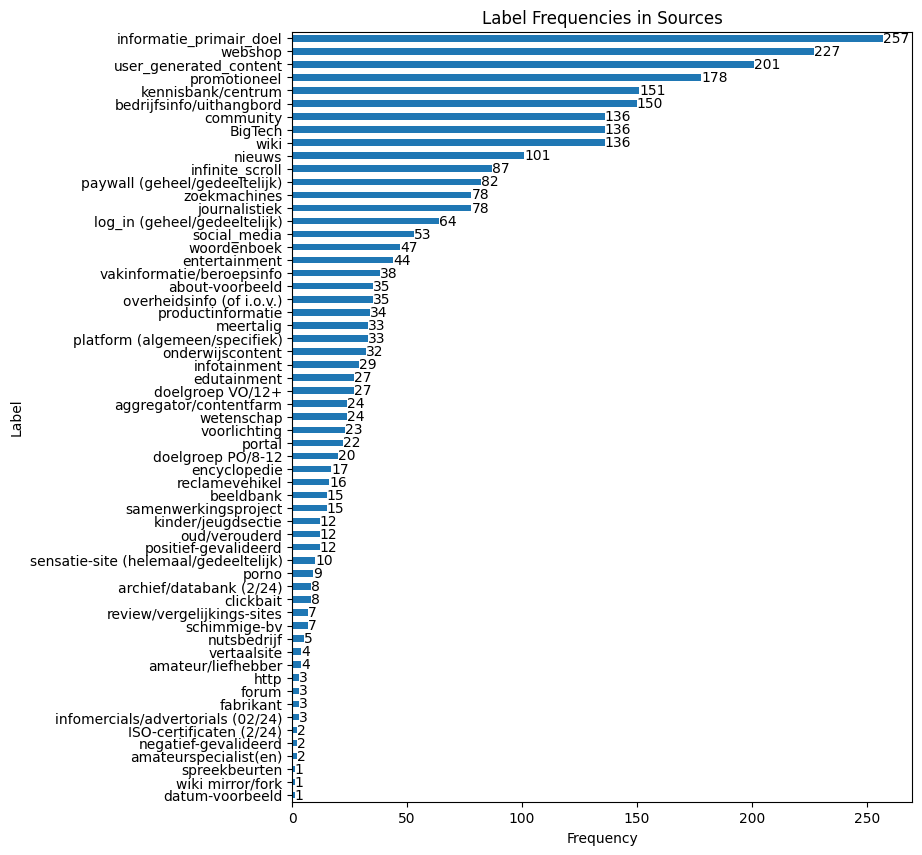

In [15]:
ax = (
    results["Bron: Vrije labels"]
    .str.split(",")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title="Label Frequencies in Sources",
        xlabel="Frequency",
        ylabel="Label",
        figsize=(8, 10),
    )
)

ax.bar_label(ax.containers[0])

[Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0

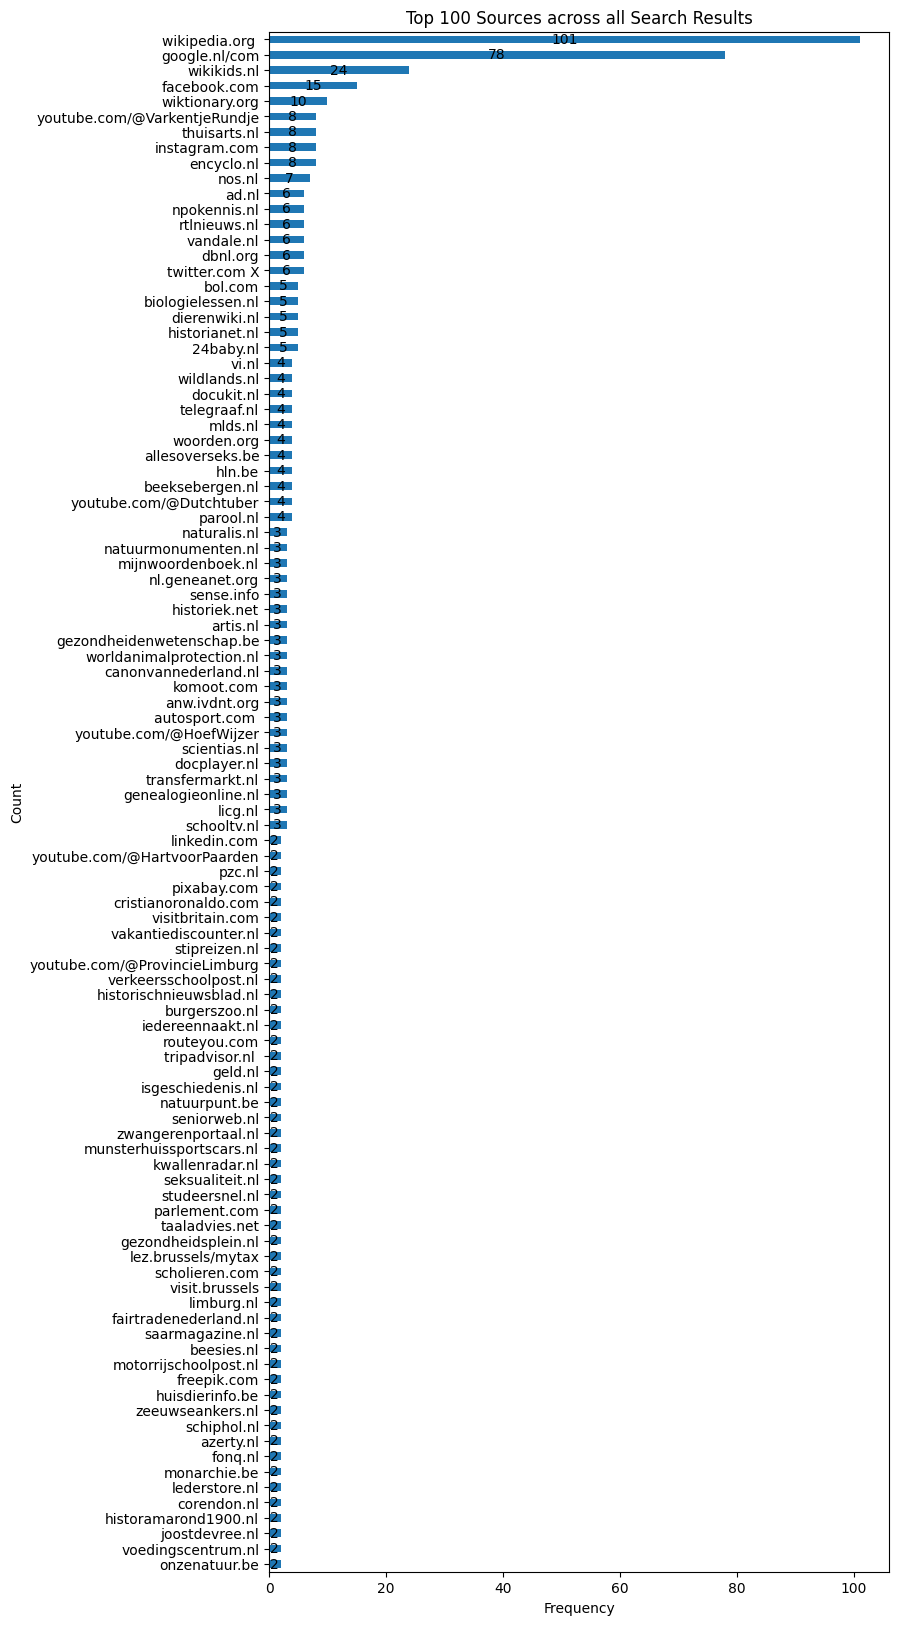

In [16]:
n = 100

ax = (
    results["Bronnen DB"]
    .value_counts()
    .filter(regex="^[^*]")[:n]
    .sort_values(ascending=True)
    .plot(
        kind="barh",
        figsize=(8, n // 5),
        title=f"Top {n} Sources across all Search Results",
        xlabel="Frequency",
        ylabel="Count",
    )
)

ax.bar_label(ax.containers[0], label_type="center")

## Sources

[Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '13'),
 Text(0, 0, '24'),
 Text(0, 0, '36'),
 Text(0, 0, '42'),
 Text(0, 0, '48'),
 Text(0, 0, '202'),
 Text(0, 0, '272')]

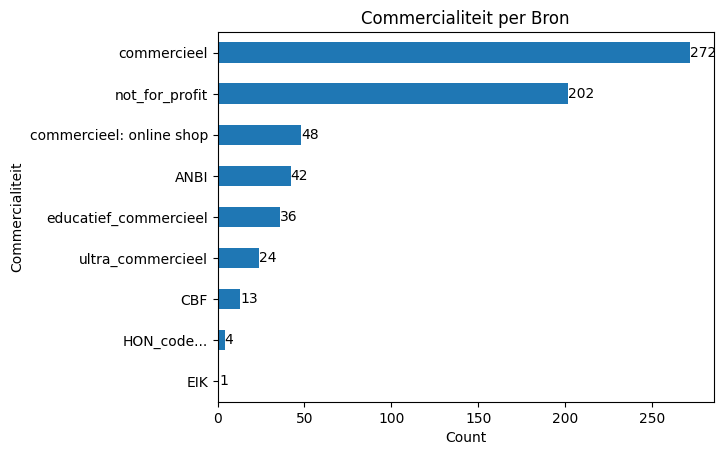

In [17]:
ax = (
    sources["Commercialiteit"]
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title="Commercialiteit per Bron",
        xlabel="Count",
        ylabel="Commercialiteit",
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '13'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '21'),
 Text(0, 0, '21'),
 Text(0, 0, '23'),
 Text(0, 0, '33'),
 Text(0, 0, '38'),
 Text(0, 0, '55'),
 Text(0, 0, '87'),
 Text(0, 0, '146')]

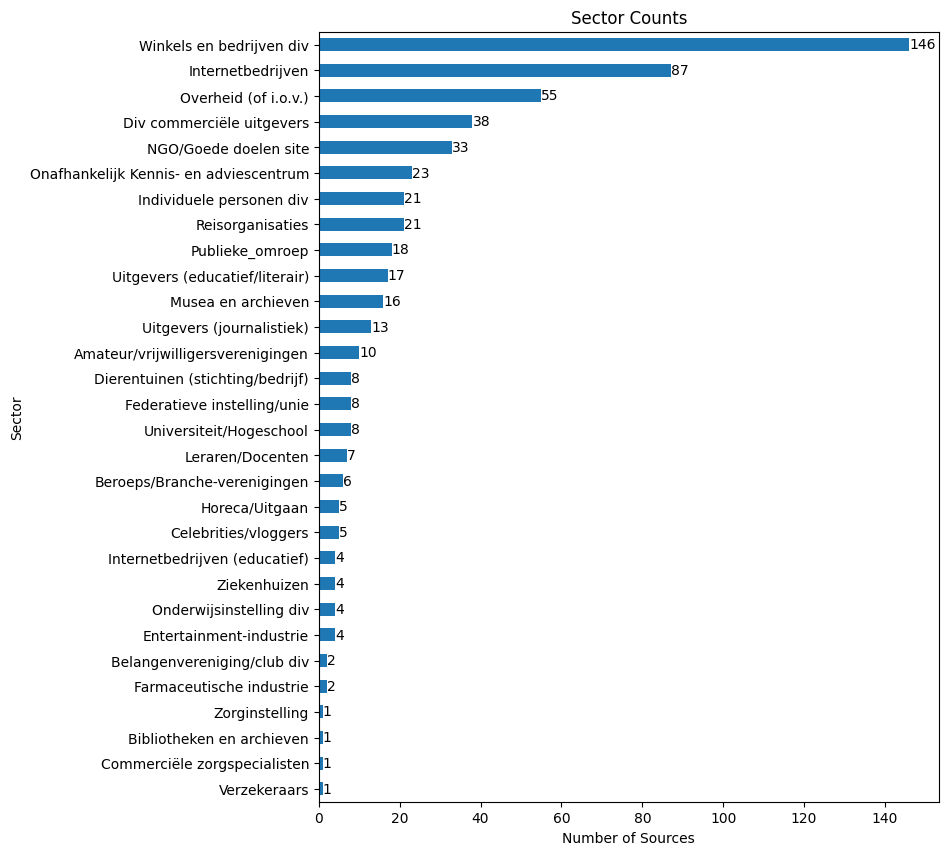

In [27]:
ax = (
    sources["Sector"]
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title="Sector Counts",
        xlabel="Number of Sources",
        ylabel="Sector",
        figsize=(8, 10),
    )
)
ax.bar_label(ax.containers[0])

## Queries and Result Pages

[Text(0, 0, '46'),
 Text(0, 0, '26'),
 Text(0, 0, '12'),
 Text(0, 0, '7'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

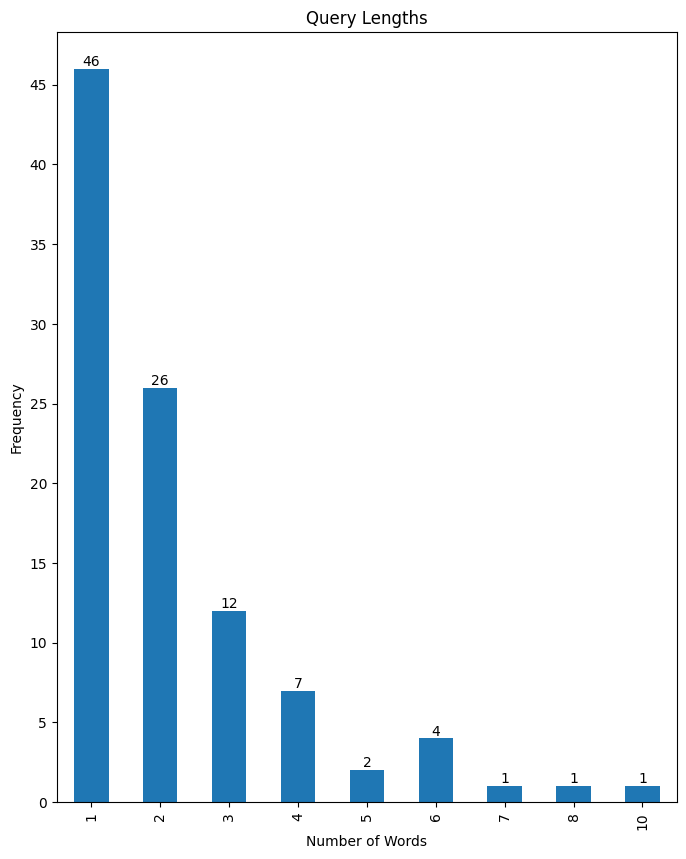

In [19]:
ax = (
    queries["Query"]
    .str.split(" ")
    .str.len()
    .value_counts()
    .sort_index()
    .plot(
        kind="bar",
        title="Query Lengths",
        ylabel="Frequency",
        xlabel="Number of Words",
        figsize=(8, 10),
        yticks=range(0, 50, 5),
    )
)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '25'),
 Text(0, 0, '29'),
 Text(0, 0, '67'),
 Text(0, 0, '85')]

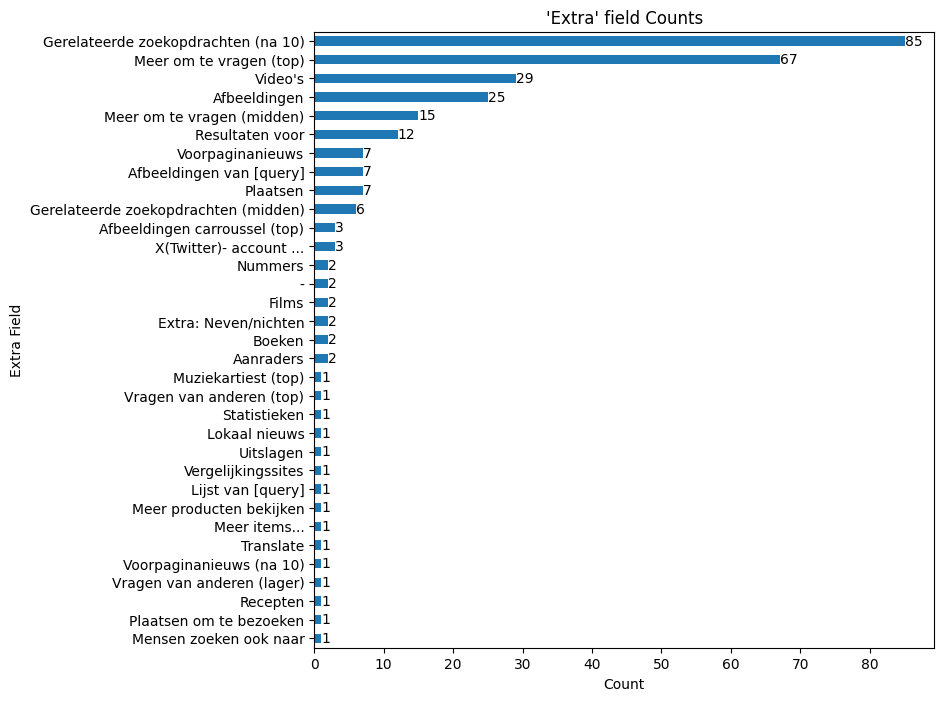

In [20]:
ax = (
    queries["Extra (top-down)"]
    .str.split(", ")
    .explode()
    .value_counts(ascending=True)
    .plot(
        kind="barh",
        title="'Extra' field Counts",
        figsize=(8, 8),
        xlabel="Count",
        ylabel="Extra Field",
    )
)
ax.bar_label(ax.containers[0])